## Metody Nieparametryczne w Statystyce
# Zadanie 4
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście Manna-Whitneya i w teście równości dwóch wartości oczekiwanych (funkcja t.test) w przypadku, gdy dane pochodzą z rozkładów 𝜒2 o różniej liczbie stopni swobody. W trakcie symulowania danych należy pamiętać, by dane spełniały hipotezę główną (tzn. by miały tę sama wartość oczekiwaną. Zbadać wpływ standaryzacji danych na uzyskane wyniki.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [2]:
import numpy as np, pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind, chi2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing

2. Generowanie czterech wykresów - dwóch dla danych bez standaryzacji i kolejnych dla danych standaryzowanych. Oba wektory liczbowe pochodzić będą z rozkładów chi2 - jednego o stałych stopniach swobody (13) i drugiego o stopniach swobody ze zbioru {8, 13, 21, 34}.

Test t-Studenta polega na obliczeniu statystyki t na podstawie różnicy pomiędzy średnimi próbek, ich liczebności oraz odchylenia standardowego i obliczeniu p-value.

Test Manna-Whitneya opiera się na porównywaniu sumy rang jednej próbki z sumą rang drugiej próbki w celu stwierdzenia, czy istnieje statystycznie istotna różnica między medianami tych grup.

H0: wartości oczekiwane są sobie równe

H1: wartości oczekiwane są różne

Zliczam przypadki, w których hipoteza zerowa zostaje odrzucona.

Test  t-studenta


100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Test  Manna-Whitneya


100%|██████████| 50/50 [00:26<00:00,  1.86it/s]


Test  t-studenta


100%|██████████| 50/50 [00:11<00:00,  4.49it/s]


Test  Manna-Whitneya


100%|██████████| 50/50 [00:29<00:00,  1.72it/s]


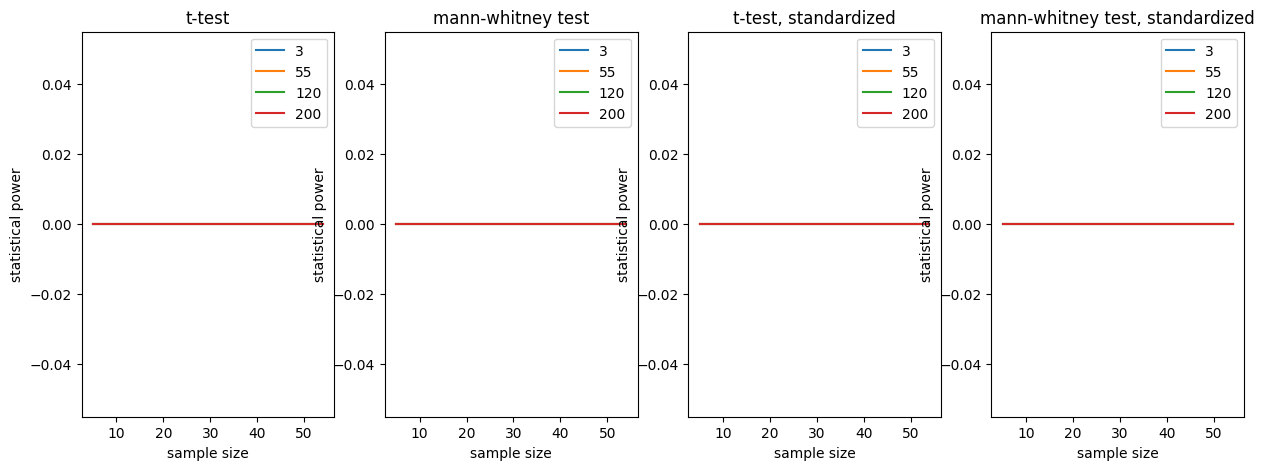

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for k in range(0, 4):    
    results = pd.DataFrame(columns=["df=3", "df=55", "df=120", "df=200"])
    buf = []
    print("Test ", "t-studenta" if k%2 == 0 else "Manna-Whitneya")
    for n in tqdm(range (5, 55)):
        for i in range (0, 100):
            for df in [8, 13, 21, 34]:
                #generowanie dwóch wektorów liczbowych z rozkładu normalnego
                x1 = chi2.rvs(size=n, df=df)
                x2 = chi2.rvs(size=n, df=df)

                if k < 2:
                    x2 = x2 - (np.mean(x2) - np.mean(x1))
                else:
                    x1 = (x1 - np.mean(x1)) / np.std(x1)
                    x2 = (x2 - np.mean(x2)) / np.std(x2)

                #testy na równość wartości oczekiwanej
                if k%2 == 0:
                    buf.append(ttest_ind(x1, x2)[1] < .05)
                else:
                    buf.append(mannwhitneyu(x1, x2)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title=("t-test" if k%2==0 else "mann-whitney test") + (", standardized" if k > 1 else ""), ax = axes[k],
                xlabel="sample size", ylabel="statistical power")

Żaden z testów, niezależnie od liczby stopni swobody ani od liczby obserwacji nie daje fałszywych wyników. Zarówno t-test oraz test manna-whitneya są dobrym wyborem przy testowaniu hipotez o równości średnich dla danych z rozkładu chi2